# Dekompozycja szeregu

W trakcie budowy modelu przeprowadza się **dekompozycje szeregu czasowego** w zależności od przyjętych założeń.

**Oznaczenia**: $m_t$ - trend, $s_t$ - sezonowość, $\varepsilon_t$ - szum.

**Model addytywny** - wielkość wahań sezonowych lub wariancja danych wokół tendencji długoterminowej (trendu) nie zmienia się wraz z poziomem szeregu:
$$y_t = m_t + s_t + \varepsilon_t$$

**Model multiplikatywny** - amplituda wahań sezonowych lub wariancja danych proporcjonalna do poziomu szeregu:
$$y_t = m_t \cdot s_t \cdot \varepsilon_t$$


In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#from google.colab import files
#src = list(files.upload().values())[0]
#open('ts_utils.py','wb').write(src)

#from ts_utils import check_time_series_stationary

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# from statsmodels.tsa.stattools import adfuller
# def check_time_series_stationary(y, rolling_len = 12):
    
#     y = pd.Series(y)
    
#     df_test = adfuller(y)
    
#     if df_test[1] < 0.05:
#         print('Szereg jest stacjonarny')
#     else:
#         print('Szereg jest niestacjonarny')
    
#     print("{0:^32s}".format("Dickey-Fuller Test"))
#     print("-"*32+"\n")
    
#     print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
#     print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
#     print("-"*32+"\n")
    
#     rolling_mean = y.rolling(rolling_len).mean()
#     rolling_var = y.rolling(rolling_len).var()

#     plt.plot(y)
#     plt.plot(rolling_mean, label="Rolling mean")
#     plt.plot(rolling_var, label="Rolling var")
#     plt.legend()
#     plt.show()
    
#     print("{0:^32s}".format("Autocorrelation plot"))
#     print("-"*32+"\n")
#     pd.plotting.autocorrelation_plot(y)
#     plt.show()

## Algorytm dekompozycji szeregu czasowego

1. Wyznaczamy oszacowany składnik trendu $\hat{m_t}$, wykorzystując np. metodę średniej ruchomej.
2. Oszacowany trend jest eliminowany z danych. Wyznaczamy szereg:

    a) dekompozycja addytywna: $y_t - \hat{m_t}$,
    
    b) dekompozycja multiplikatywna: $y_t/\hat{m_t}$.
    
3. Wyznaczamy indeksy sezonowe dla poszczególnych miesięcy, kwartałów, itd. Indeksy sezonowe są wyznaczane poprzez uśrednienie wartości szeregu z kroku 2 dla każdej jednostki czasu (np. miesiąc, kwartał) i wszystkich okresów (lat).
4. Standaryzujemy wskaźniki sezonowe, tak aby nie miały one wpływu na tendencję długoterminową.
5. Wyznaczamy reszty, usuwając trend i sezonowość

    a) dekompozycja addytywna: $\varepsilon_t = y_t - \hat{m_t} - \hat{s_t}$,
    
    b) dekompozycja multiplikatywna: $\varepsilon_t = y_t/\hat{m_t}/\hat{s_t}$.


## ***Zadanie 1

a) Przy użyciu metody średniej ruchomej oszacuj trend dla szeregu `southern`, wiedząc, że dla szeregu długości $n$, tzn. $Y_1, \ldots, Y_n$ estymacja średniej ruchomej w chwili $t$ jest postaci:
$$m(t)=\frac{1}{2q+1}\sum_{i=-q}^qY_{t-i},$$
gdzie $q$ jest rzędem średniej ruchomej (np. `convolution_filter` z `statsmodels.tsa.filters.filtertools`). 

Innymi słowy, aby wyznaczyć oszacowaną wartość trendu w chwili $t$, uśredniamy $q$ poprzedzających ten moment wartości i $q$ wartości następujących po tym momencie.

b) Następnie wyznacz indeksy sezonowe dla mięsięcy a następnie wystandaryzuj je przez średnią.

c) Oszacuj wartość reszt szeregu, sprawdź jego stacjonarność.

Załóż, że szereg `southern` jest szeregiem addytywnym.

In [ ]:
#chcemy dekomponować szereg, ponieważ łatwiej jest modelować poszczególne części (np. trend regrsją liniową czy wielomianową)
#sezonowość, przez powtarzanie dla konkretnych miesięcy, średnich wyliczonych na danych miesiącach na części uczącej pozbawionej trendu
#losowość (jeśli stacjonarna to np. ARMA)
southern = pd.read_csv('southern.csv', 
                 parse_dates=['Date'], index_col='Date')

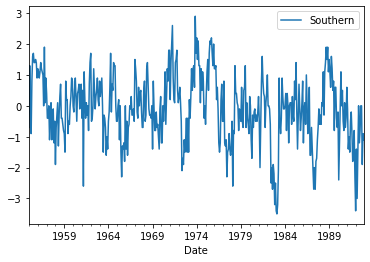

In [ ]:
southern.plot()

#### Oszacowanie trendu

In [ ]:
from statsmodels.tsa.filters.filtertools import convolution_filter
# używamy metody convolution_filter, jeśli n_sizes = 2 sumujemy wszystkie elmenty odległe o freq/2 z dwóch stron od zadanego punktu i tak przechodzimy punkt po punkcie
# innymi słowy robimy sumę ruchomą

In [ ]:
#średnia ruchoma
period = 12
trend = convolution_filter(southern.Southern, np.ones(period + 1), nsides=2) / (period + 1)

In [ ]:
#wykres średniej ruchomej
plt.plot(southern)
plt.plot(trend)

#### Oszacowanie sezonowości

In [ ]:
#wyrzucamy trend
detrended = southern.Southern - trend







#### Oszacowanie elementu losowego i diagnostyka stacjonarności

In [ ]:
#rozpatrujemy część losową - bez średniej i bez trendu
resid = detrended - seasonal
plt.plot(resid)

## Zadanie 2
Dokonaj dekompozycji szeregu przy użyciu `seasonal_decompose` dla następujących danych:
- `southern`,
- `a10`,
- `AirPassengers`, 
- `sunspots`.

### `southern`

In [ ]:
southern = pd.read_csv('southern.csv', 
                 parse_dates=['Date'], index_col='Date')

### `a10`

In [ ]:
a10 = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
a10.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### `AirPassengers`

In [ ]:
air_passengers = pd.read_csv('AirPassengers.csv', 
                 parse_dates=['Month'], index_col='Month')

air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### `sunspot` 
Time Series:
Start = 1700 
End = 1988 
Frequency = 1 

In [ ]:
sunspot = pd.read_csv('sunspot.csv')
sunspot

,value
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0
...,...
284,45.9
285,17.9
286,13.4
287,29.2
